# Data Science - Clustering Problem Solution

# Segmentation of Data using K Means Clustering

## Problem Statement:
A Fleet Management company is planning to provide safe & Efficient Driving training to the drivers. They also want to provide benefits to the drivers based on their performance. The Company wants to group their drivers into different segments based on the Speeding Behaviour and the Distance they drive per day. The Company wants you to build a Segentation/clustering Model which will group their drivers into groups.

### Data:
You have been provided with the necessary data as a .csv file.

### Step 1: Import Data

In [1]:
import pandas as pd
from sklearn.cluster import KMeans

import warnings; 
warnings.simplefilter('ignore')

In [4]:
df = pd.read_csv('D:\\Data Science\\s3-09&10feb 19\\09\\Kmeans.csv')

### Step 2: Exploratory Data Analysis

In [5]:
df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [6]:
df.describe()

,Driver_ID,Distance_Feature,Speeding_Feature
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [7]:
import seaborn as sns

### Plot 1

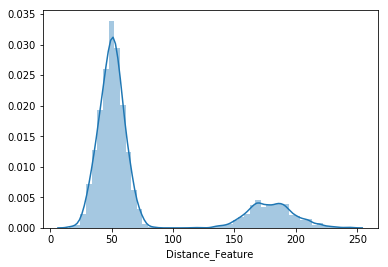

In [8]:
sns.distplot(df['Distance_Feature'])

### Insights:
There are two groups of drivers here, one group covering average 50 Miles/Day. The other covers average 160 Miles/Day.

### Plot 2

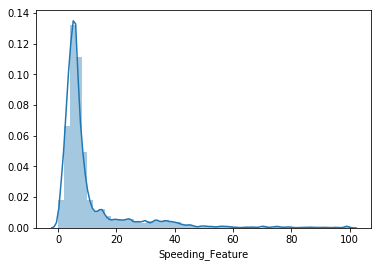

In [9]:
sns.distplot(df['Speeding_Feature'])

### Insights:

Most of the Drivers ride at the speed around 10 Miles/Hour. But there are few drivers who drive at a speed of even 100 Miles/hour!!!

### Plot 3

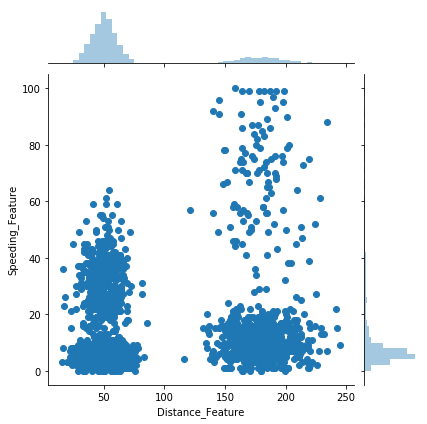

In [10]:
sns.jointplot("Distance_Feature", "Speeding_Feature", data=df)

### Step 3: Build the Model

Let us try to form two segments of data from the DataSet using KMeans algorithm

Note: No train Test Data Split as this is an unsupervised Learning Algorithm

In [11]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df.drop('Driver_ID',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
kmeans.cluster_centers_

array([[ 50.04763437,   8.82875   ],
       [180.017075  ,  18.29      ]])

#### Now, Let us add the cluster numbers to the data frame in a new column - label_2

In [13]:
label=kmeans.labels_
df['label_2']=label
set(df['label_2'])

{0, 1}

#### The above output shows that two groups have been formed from the dataset given.

Plot the Clusters and Analyse

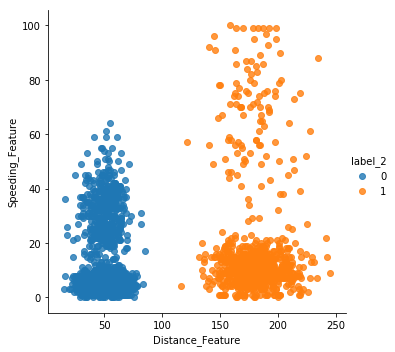

In [14]:
sns.lmplot('Distance_Feature','Speeding_Feature',data=df,fit_reg=False,hue="label_2")

### Client asks for four groups from the data
Let us try to form four segments of data from the DataSet using KMeans algorithm

In [15]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df.drop(['Driver_ID','label_2'],axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
kmeans.cluster_centers_

array([[ 50.40482436,  32.36533958],
       [180.34311782,  10.52011494],
       [177.83509615,  70.28846154],
       [ 49.99263253,   5.20447169]])

label_4=kmeans.labels_
set(label_4)



The above output shows that we have four segments of data groups.

In [20]:
df['label_4']=label_4
df.head()

,Driver_ID,Distance_Feature,Speeding_Feature,label_2,label_4
0,3423311935,71.24,28,0,0
1,3423313212,52.53,25,0,0
2,3423313724,64.54,27,0,0
3,3423311373,55.69,22,0,0
4,3423310999,54.58,25,0,0


Let us visualise the four clusters now.

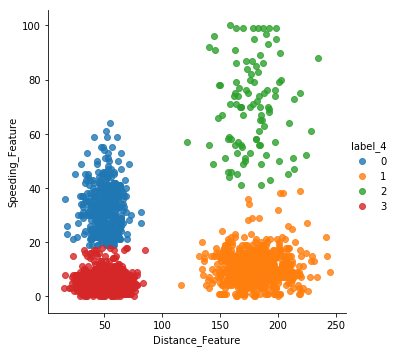

In [22]:
sns.lmplot('Distance_Feature', 'Speeding_Feature', data=df, fit_reg=False, hue="label_4") 

## Elbow Method of determining optimum number of clusters:

In [23]:
sse={}

#For Loop to capture the Inertia

for k in range(1, 20):
    kmeans = KMeans(n_clusters=k).fit(df.drop(['Driver_ID','label_2','label_4'],axis=1))
    sse[k] = kmeans.inertia_
    
#Store the no. of groups and the error as separate lists
groups=list(sse.keys())
error=list(sse.values())

#Club the lists as a dataframe
error_df=pd.DataFrame(list(zip(groups, error)),columns=['groups','error'])
error_df.head()

,groups,error
0,1,1.218463e+07
1,2,1.316421e+06
2,3,9.926341e+05
3,4,7.196011e+05
4,5,5.346676e+05


## Elbow Method Graph to find Best number of clusters statiscally

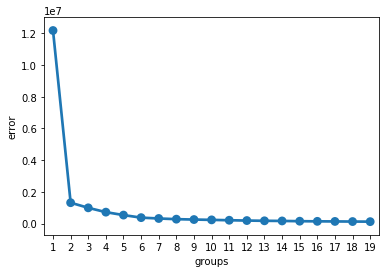

In [24]:
sns.pointplot(x="groups", y="error", data=error_df)

From the Above Graph, it looks like 2 groups itself is efficient clustering of the data set.

But the error rate seems to reduce till 6 Groups, after which it is consistent.

As we already have seen how 4 groupd are formed, let us try for 5 segments and 6 segments

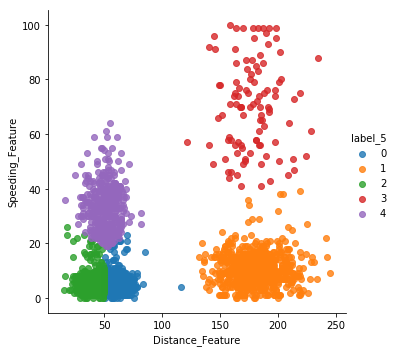

In [25]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df.drop(['Driver_ID','label_2','label_4'],axis=1))
df['label_5']=kmeans.labels_
sns.lmplot('Distance_Feature', 'Speeding_Feature', data=df, fit_reg=False, hue="label_5")

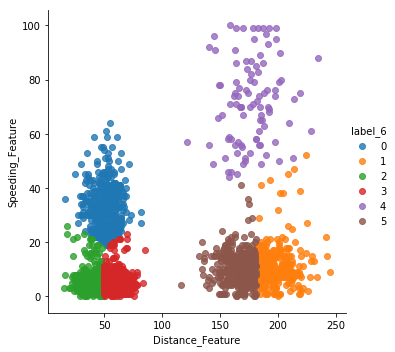

In [26]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(df.drop(['Driver_ID','label_2','label_4','label_5'],axis=1))
df['label_6']=kmeans.labels_
sns.lmplot('Distance_Feature', 'Speeding_Feature', data=df, fit_reg=False, hue="label_6") 

## Conclusion:
Hence using the K Means Algorithm, the given set of 4000 Drivers have been classified into 2,4,5 and 6 Groups. Upon receiving confirmation from the client on number of groups to fix, we shall freeze the Model.